Hace falta algo que indique con qué entorno vamos a trabajar

Importar lo que hace falta

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [4]:
data_url = "../Data/properatti.csv"

In [5]:
data = pd.read_csv(data_url, encoding="utf-8")

In [6]:
#limpiamos los que tienen NaN en el precio
data = data.dropna(axis=0, how='any', subset=['price_aprox_usd'])

In [7]:
#funcion para borrar outliers.
def borrar_outliers(data, columnas):
    """Solo recibo columnas con valores numericos. 
    Las columns van en forma de tupla"""
    cols_limpiar = columnas
    mask=np.ones(shape=(data.shape[0]), dtype=bool)

    for i in cols_limpiar:
        
        #calculamos cuartiles, y valores de corte
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)
        RSI=Q3-Q1
        max_value=Q3+1.5*RSI
        min_value=Q1-1.5*RSI
        
        #ajusto el min value a mano... no puede ser negativo.
        min_value=max(min_value, data[i].quantile(0.05))
        
        #filtramos por max y min
        mask=np.logical_and(mask, np.logical_and(data[i]>=min_value, data[i]<=max_value))
    return data[mask]

In [8]:
# por ahora sacamos los outliers de precio y metros cubiertos de todo el dataset, habría que hacerlo por zona y tipo

# data = borrar_outliers(data, ('price_aprox_usd', 'surface_covered_in_m2'))
data

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...


#### Categorizar precio

In [9]:
price_desc = data['price_aprox_usd'].describe()

In [10]:
price_desc

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [11]:
price_bins = round( (price_desc['max'] - price_desc['min']) / 50000 ) 

In [12]:
data['price_cut'] = pd.cut(data['price_aprox_usd'], bins = price_bins, right = False, labels = None, retbins = False, precision = 0)

#### Categorizar superficie cubierta

In [13]:
surface_desc = data['surface_covered_in_m2'].describe()

In [14]:
surface_desc

count     87660.000000
mean        129.327515
std         746.281982
min           0.000000
25%          45.000000
50%          73.000000
75%         150.000000
max      187000.000000
Name: surface_covered_in_m2, dtype: float64

In [15]:
surface_bins = round( (surface_desc['max'] - surface_desc['min']) / 50 ) 

In [16]:
data['surface_cut'] = pd.cut(data['surface_covered_in_m2'], bins = surface_bins, right = False, retbins = False, precision = 0)

## tabla de contingencia precio en dólares y superficie cubierta

In [17]:
pd.crosstab(index = data['price_cut'], columns = data['surface_cut'], margins = True, dropna = True, normalize = 'columns')

surface_cut,"[0.0, 50.0)","[50.0, 100.0)","[100.0, 150.0)","[150.0, 200.0)","[200.0, 250.0)","[250.0, 300.0)","[300.0, 350.0)","[350.0, 400.0)","[400.0, 450.0)","[450.0, 500.0)",...,"[19600.0, 19650.0)","[20350.0, 20400.0)","[23850.0, 23900.0)","[25000.0, 25050.0)","[27850.0, 27900.0)","[30000.0, 30050.0)","[38200.0, 38250.0)","[49000.0, 49050.0)","[186950.0, 187187.0)",All
price_cut,,,,,,,,,,,,,,,,,,,,,
"[0.0, 49995.0)",0.075878,0.021098,0.011259,0.004446,0.003306,0.001949,0.002369,0.001587,0.000000,0.001894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032170
"[49995.0, 99990.0)",0.555522,0.212526,0.084704,0.036373,0.014144,0.010721,0.005685,0.007937,0.003304,0.005682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.252190
"[99990.0, 149985.0)",0.240883,0.307559,0.190694,0.086219,0.046657,0.023717,0.018475,0.008730,0.011013,0.007576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.205989
"[149985.0, 199980.0)",0.057644,0.219522,0.209957,0.168261,0.087436,0.053281,0.030791,0.013492,0.011013,0.007576,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135820
"[199980.0, 249976.0)",0.017267,0.110166,0.130179,0.161256,0.102866,0.064977,0.037423,0.011111,0.013216,0.011364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"[8999119.0, 9049114.0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000011
"[9899031.0, 9949026.0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000011
"[10998924.0, 11048919.0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000011


## Existe una importate asociación entre el precio en dólares y la superficie cubierta

---

In [18]:
def regex_to_tags(col, reg, match, not_match = np.NaN) :
    u"""Returns a series with 'match' values result of apply the regular expresion to the column
    the 'match' value will be when the regular expression search() method found a match
    the 'not_match' value will be when the regular expression serach() method did not found a match
    col : column where to apply regular expresion
    reg : regular expresion compiled
    """
    
    serie = col.apply(lambda x : x if x is np.NaN else reg.search(x))
    serie = serie.apply(lambda x : match if x is not None else not_match)
   
    return serie

In [19]:
_pattern = 'cochera|garage|auto'
_express = re.compile(_pattern, flags = re.IGNORECASE)

data['cochera'] = regex_to_tags(data['description'], _express, 'si', 'no')


In [20]:
_pattern = 'piscina|pileta'
_express = re.compile(_pattern, flags = re.IGNORECASE)

data['pileta'] = regex_to_tags(data['description'], _express, 'si', 'no')


In [21]:
_pattern = 'parrilla'
_express = re.compile(_pattern, flags = re.IGNORECASE)

data['parrilla'] = regex_to_tags(data['description'], _express, 'si', 'no')


In [22]:
pd.crosstab(index = data['price_cut'], columns = data['cochera'], margins = True, dropna = True, normalize = 'columns')

cochera,no,si,All
price_cut,,,
"[0.0, 49995.0)",0.056391,0.020269,0.038925
"[49995.0, 99990.0)",0.336771,0.194235,0.267850
"[99990.0, 149985.0)",0.205320,0.209252,0.207222
"[149985.0, 199980.0)",0.115644,0.149759,0.132140
"[199980.0, 249976.0)",0.061827,0.093035,0.076917
...,...,...,...
"[15998434.0, 16048429.0)",0.000019,0.000000,0.000010
"[19498092.0, 19548087.0)",0.000000,0.000021,0.000010
"[22947754.0, 22997749.0)",0.000019,0.000000,0.000010


### Existe asociación entre el precio en dólares y la oferta de cochera solo en el rango de precios 53000 a 105000 

In [23]:
pd.crosstab(index = data['price_cut'], columns = data['pileta'], margins = True, dropna = True, normalize = 'columns')

pileta,no,si,All
price_cut,,,
"[0.0, 49995.0)",0.048350,0.013656,0.038925
"[49995.0, 99990.0)",0.322201,0.122138,0.267850
"[99990.0, 149985.0)",0.226632,0.155183,0.207222
"[149985.0, 199980.0)",0.134222,0.126556,0.132140
"[199980.0, 249976.0)",0.070210,0.094899,0.076917
...,...,...,...
"[15998434.0, 16048429.0)",0.000014,0.000000,0.000010
"[19498092.0, 19548087.0)",0.000000,0.000037,0.000010
"[22947754.0, 22997749.0)",0.000014,0.000000,0.000010


### Existe asociación entre el precio en dólares y la oferta de piltea solo en el rango de precios 53000 a 105000
#### En otros rangos se observa una diferencia de proporciones de hasta un 5% que podría considerarse

In [24]:
pd.crosstab(index = data['price_cut'], columns = data['parrilla'], margins = True, dropna = True, normalize = 'columns')

parrilla,no,si,All
price_cut,,,
"[0.0, 49995.0)",0.050491,0.011631,0.038925
"[49995.0, 99990.0)",0.329882,0.121476,0.267850
"[99990.0, 149985.0)",0.219041,0.179331,0.207222
"[149985.0, 199980.0)",0.126278,0.145971,0.132140
"[199980.0, 249976.0)",0.066719,0.100980,0.076917
...,...,...,...
"[15998434.0, 16048429.0)",0.000014,0.000000,0.000010
"[19498092.0, 19548087.0)",0.000014,0.000000,0.000010
"[22947754.0, 22997749.0)",0.000014,0.000000,0.000010


### Existe asociación entre el precio en dólares y la oferta de parrilla solo en el rango de precios 53000 a 105000
#### En otros rangos se observa una diferencia de proporciones de hasta un 5% que podría considerarse

In [57]:
data_prueba = data[data['place_name']=='Mar del Plata']

In [58]:
data_prueba.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'price_cut', 'surface_cut', 'cochera', 'pileta',
       'parrilla'],
      dtype='object')

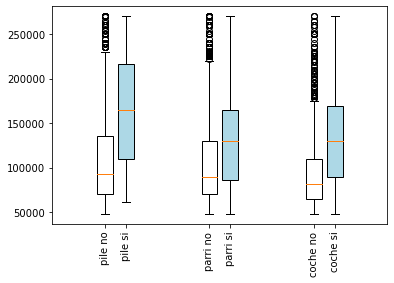

In [59]:
data_prueba = borrar_outliers(data_prueba, ('price_aprox_usd', 'surface_covered_in_m2'))


PileN = data_prueba[data_prueba.pileta=='no'].price_aprox_usd
PileS = data_prueba[data_prueba.pileta=='si'].price_aprox_usd

ParriN = data_prueba[data_prueba.parrilla=='no'].price_aprox_usd
ParriS = data_prueba[data_prueba.parrilla=='si'].price_aprox_usd

CocheN =data_prueba[data_prueba.cochera=='no'].price_aprox_usd
CocheS =data_prueba[data_prueba.cochera=='si'].price_aprox_usd


f, axs = plt.subplots()
plt.xticks(rotation = 90)
axs=plt.boxplot(x=[PileN,ParriN,CocheN], 
               positions=[1,2,3], labels=['pile no', 'parri no', 'coche no'], 
               patch_artist=True, widths=0.15,boxprops={'facecolor':"white"})

ax=plt.boxplot(x=[PileS,ParriS,CocheS], 
               positions=[1.2, 2.2, 3.2], labels=['pile si', 'parri si', 'coche si'], 
               patch_artist=True, widths=0.15,boxprops={'facecolor':"lightblue"})
         


In [64]:
#hacemos las iteraciones para place y para tipo. Elijo arbitrariamente cuanto quiero mostrar. 
#elijo los que tienen mas valores, y despues les paso un index para que solo me muestre el nombre del lugar
iterar_place=data_clean['place_name'].value_counts().head(20)
iterar_place = iterar_place.index

iterar_tipo=data_clean['property_type'].value_counts().head(2)
iterar_tipo = iterar_tipo.index

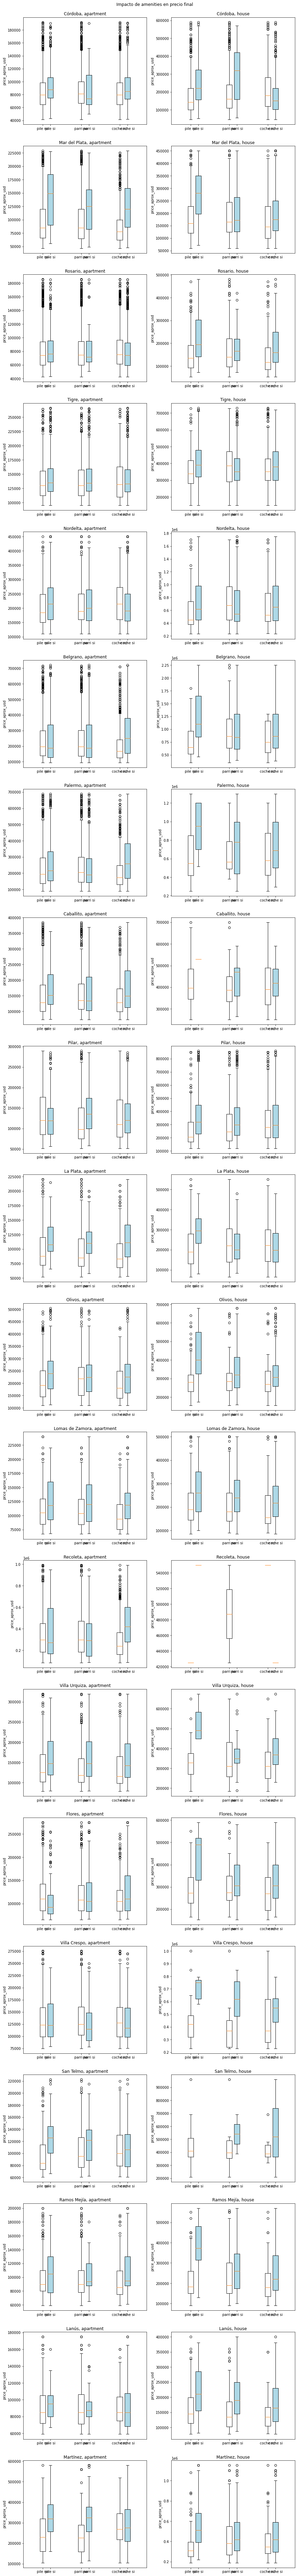

In [68]:
#Vamos a plotear, separando por groupby el data_clean

#levanto el subplot
len_tipo=len(iterar_tipo)
len_place=len(iterar_place)

fig, axs = plt.subplots(len_place,len_tipo, figsize=(7*len_tipo,6*len_place), facecolor=(1, 1, 1))

#esto es el titulo
fig.suptitle(t="Impacto de amenities en precio final")

#posicion relativa de los graficos, para que no se vean tan apretados.
fig.subplots_adjust(top=0.975)

#Un "j" para cada tipo
j=0 
for tipo in iterar_tipo:
    
    #Un "i" para cada place
    i=0
    for place in iterar_place:
        #reducimos para sacar todo lo que no nos sirve.
        data_reducida = data_clean.loc[:, ['place_name', 'price_aprox_usd', 'surface_covered_in_m2', 'property_type', 
                                           'cochera', 'pileta', 'parrilla']]
        
        #agrupamos la data. filtrando por cada place.
        data_grouped = data_reducida.groupby(by = 'place_name').filter(lambda x: all(x['place_name']==place))

        #volvemos a agrupar la data. filtrando por cada tipo.
        data_grouped = data_grouped.groupby(by = 'property_type').filter(lambda x: all(x['property_type']==tipo))
        
        #aplico el filtro de ouliers para cada grupo
        data_grouped = borrar_outliers(data_grouped, ('price_aprox_usd','surface_covered_in_m2'))
        
        #empieza la parte divertida.
        amenities=['pileta', 'parrilla', 'cochera']
        aux=list(range(0,len(amenities)*2))
        count=0
        
        for amenity in amenities:
            aux[count]=data_grouped[data_grouped[amenity]=='no'].price_aprox_usd
            aux[count+1]=data_grouped[data_grouped[amenity]=='si'].price_aprox_usd
            count+=2

        axs[i,j].boxplot(x=[aux[0], aux[2], aux[4]], 
                       positions=[1,2,3], labels=['pile no', 'parri no', 'coche no'], 
                       patch_artist=True, widths=0.15,boxprops={'facecolor':"white"})

        axs[i,j].boxplot(x=[aux[1], aux[3], aux[5]], 
                       positions=[1.2,2.2,3.2], labels=['pile si', 'parri si', 'coche si'], 
                       patch_artist=True, widths=0.15,boxprops={'facecolor':"lightblue"})


        #seteo las decoraciones para cada axs[i,j]
        axs[i,j].set_title(f'{place}, {tipo}')
#         axs[i,j].set_xlabel(f'surface_covered_in_m2  //  correlacion={corr_grafico}')
        axs[i,j].set_ylabel('price_aprox_usd')

        #vamos al siguiente place. Muevo hacia abajo en el plot
        i+=1
    #vamos a siguiente tipo Muevo hacia la derecha en el plot
    j+=1